# 0 is Inactive
# 1 is active

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [41]:
data=pd.read_csv('final_data.csv')

In [42]:
data['label'] = data['label'].replace({'inactive': 0, 'active': 1})

In [43]:
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column

In [44]:
y

0       0
1       0
2       0
3       1
4       1
       ..
7459    0
7460    1
7461    0
7462    0
7463    0
Name: label, Length: 7464, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
models = {
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}


In [47]:
bold_text = "\033[1m"
reset_formatting = "\033[0m"

In [32]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics for training dataset
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)

    # Calculate metrics for testing dataset
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)

    # Print the results
    print(f"\n{bold_text}{name}{reset_formatting}")
    print("Training Metrics")
    print(f"Training Accuracy: {train_accuracy * 100:.4f}%")
    print(f"Training Precision: {train_precision * 100:.4f}%")
    print(f"Training Recall: {train_recall * 100:.4f}%")
    print(f"Training F1-score: {train_f1 * 100:.4f}%")

    print("Testing Metrics")
    print(f"Testing Accuracy: {test_accuracy * 100:.4f}%")
    print(f"Testing Precision: {test_precision * 100:.4f}%")
    print(f"Testing Recall: {test_recall * 100:.4f}%")
    print(f"Testing F1-score: {test_f1 * 100:.4f}%")

    
    #ROCz Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
    
    # Plot ROC Curve
    print(f'{name}')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print("-------------------------------------------")



AdaBoost
Training Metrics
Training Accuracy: 78.0774%
Training Precision: 78.3602%
Training Recall: 88.8495%
Training F1-score: 83.2758%
Testing Metrics
Testing Accuracy: 74.2130%
Testing Precision: 75.2863%
Testing Recall: 86.2295%
Testing F1-score: 80.3872%
-------------------------------------------

Extra Trees
Training Metrics
Training Accuracy: 98.7272%
Training Precision: 99.4493%
Training Recall: 98.4733%
Training F1-score: 98.9589%
Testing Metrics
Testing Accuracy: 80.7100%
Testing Precision: 81.6347%
Testing Recall: 88.4153%
Testing F1-score: 84.8898%
-------------------------------------------

Gradient Boosting
Training Metrics
Training Accuracy: 82.4485%
Training Precision: 82.4418%
Training Recall: 90.7579%
Training F1-score: 86.4002%
Testing Metrics
Testing Accuracy: 75.6865%
Testing Precision: 76.5385%
Testing Recall: 86.9945%
Testing F1-score: 81.4322%
-------------------------------------------

Random Forest
Training Metrics
Training Accuracy: 98.7272%
Training Prec


AdaBoost
Training Metrics
Training Accuracy: 78.0774%
Training Precision: 78.3602%
Training Recall: 88.8495%
Training F1-score: 83.2758%
Testing Metrics
Testing Accuracy: 74.2130%
Testing Precision: 75.2863%
Testing Recall: 86.2295%
Testing F1-score: 80.3872%
AdaBoost


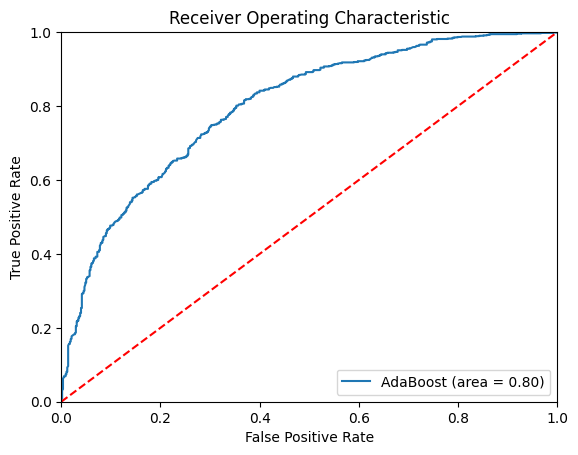

-------------------------------------------

Extra Trees
Training Metrics
Training Accuracy: 98.7272%
Training Precision: 99.4493%
Training Recall: 98.4733%
Training F1-score: 98.9589%
Testing Metrics
Testing Accuracy: 80.7100%
Testing Precision: 81.6347%
Testing Recall: 88.4153%
Testing F1-score: 84.8898%
Extra Trees


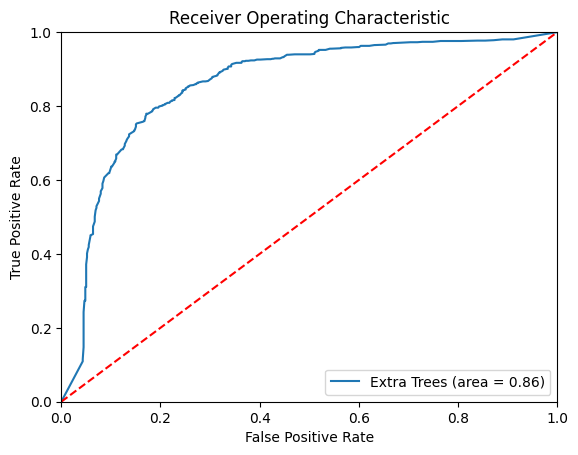

-------------------------------------------

Gradient Boosting
Training Metrics
Training Accuracy: 82.4485%
Training Precision: 82.4418%
Training Recall: 90.7579%
Training F1-score: 86.4002%
Testing Metrics
Testing Accuracy: 75.6865%
Testing Precision: 76.5385%
Testing Recall: 86.9945%
Testing F1-score: 81.4322%
Gradient Boosting


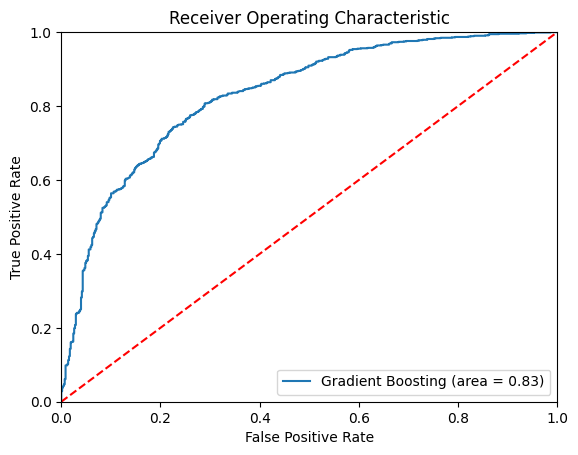

-------------------------------------------

Random Forest
Training Metrics
Training Accuracy: 98.7272%
Training Precision: 98.4620%
Training Recall: 99.4820%
Training F1-score: 98.9694%
Testing Metrics
Testing Accuracy: 80.1072%
Testing Precision: 80.9619%
Testing Recall: 88.3060%
Testing F1-score: 84.4746%
Random Forest


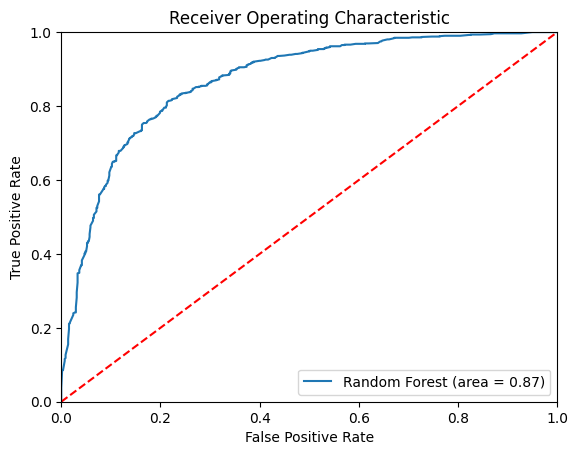

-------------------------------------------


In [9]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics for training dataset
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)

    # Calculate metrics for testing dataset
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)

    # Print the results
    print(f"\n{bold_text}{name}{reset_formatting}")
    print("Training Metrics")
    print(f"Training Accuracy: {train_accuracy * 100:.4f}%")
    print(f"Training Precision: {train_precision * 100:.4f}%")
    print(f"Training Recall: {train_recall * 100:.4f}%")
    print(f"Training F1-score: {train_f1 * 100:.4f}%")

    print("Testing Metrics")
    print(f"Testing Accuracy: {test_accuracy * 100:.4f}%")
    print(f"Testing Precision: {test_precision * 100:.4f}%")
    print(f"Testing Recall: {test_recall * 100:.4f}%")
    print(f"Testing F1-score: {test_f1 * 100:.4f}%")

    
    #ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
    
    # Plot ROC Curve
    print(f'{name}')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print("-------------------------------------------")


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np

# Initialize a dictionary to store the metrics
model_metrics = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics for training dataset
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)

    # Calculate metrics for testing dataset
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
    roc_auc = auc(fpr, tpr)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)

    # Store the results
    model_metrics[name] = {
        'Training': {
            'Accuracy': train_accuracy,
            'Precision': train_precision,
            'Recall': train_recall,
            'F1': train_f1
        },
        'Testing': {
            'Accuracy': test_accuracy,
            'Precision': test_precision,
            'Recall': test_recall,
            'F1': test_f1
        },
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm
    }


In [15]:
model_metrics

{'AdaBoost': {'Training': {'Accuracy': 0.7807737397420867,
   'Precision': 0.7836018273623467,
   'Recall': 0.888495092693566,
   'F1': 0.8327584004088413},
  'Testing': {'Accuracy': 0.7421299397186872,
   'Precision': 0.7528625954198473,
   'Recall': 0.8622950819672132,
   'F1': 0.803871625063678},
  'ROC AUC': 0.7979229300206101,
  'Confusion Matrix': array([[319, 259],
         [126, 789]], dtype=int64)},
 'Extra Trees': {'Training': {'Accuracy': 0.9872718137665383,
   'Precision': 0.9944933920704846,
   'Recall': 0.9847328244274809,
   'F1': 0.9895890410958904},
  'Testing': {'Accuracy': 0.8070997990622907,
   'Precision': 0.8163471241170535,
   'Recall': 0.8841530054644808,
   'F1': 0.8488982161594963},
  'ROC AUC': 0.8581485053037607,
  'Confusion Matrix': array([[396, 182],
         [106, 809]], dtype=int64)},
 'Gradient Boosting': {'Training': {'Accuracy': 0.8244850108859487,
   'Precision': 0.8244180287270926,
   'Recall': 0.9075790621592148,
   'F1': 0.8640020763041786},
  'T

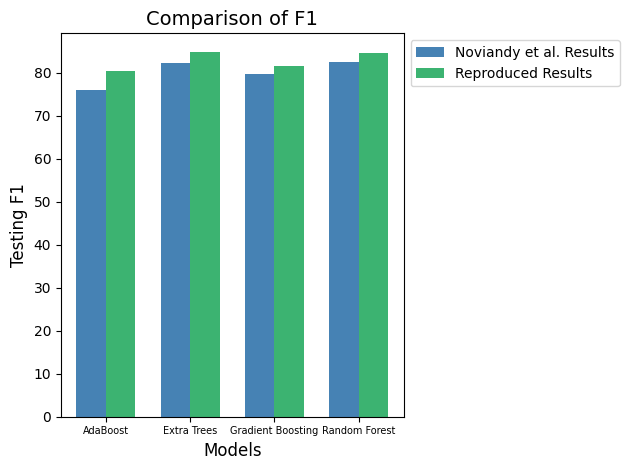

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding test results
models = ["AdaBoost", "Extra Trees", "Gradient Boosting", "Random Forest"]
testing_accuracy_results_old = [75.86, 82.25, 79.7, 82.37]
testing_accuracy_results_new = [80.38, 84.88, 81.43, 84.47]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x = np.arange(len(models))

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Define colors for the bars based on the provided colors
colors_old = ['steelblue', 'steelblue', 'steelblue', 'steelblue']
colors_new = ['mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen']

# Create the bar plots for the old and new results
bar1 = ax.bar(x - bar_width/2, testing_accuracy_results_old, bar_width, label='Noviandy et al. Results', color=colors_old)
bar2 = ax.bar(x + bar_width/2, testing_accuracy_results_new, bar_width, label='Reproduced Results', color=colors_new)

# Set the labels, title, and legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Testing F1', fontsize=12)
ax.set_title('Comparison of F1', fontsize=14)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=7, rotation=0)

ax.legend()

# Adjust the legend position to avoid overlapping with the bars
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot with a tight layout to ensure no clipping of tick-labels
plt.tight_layout()
plt.show()


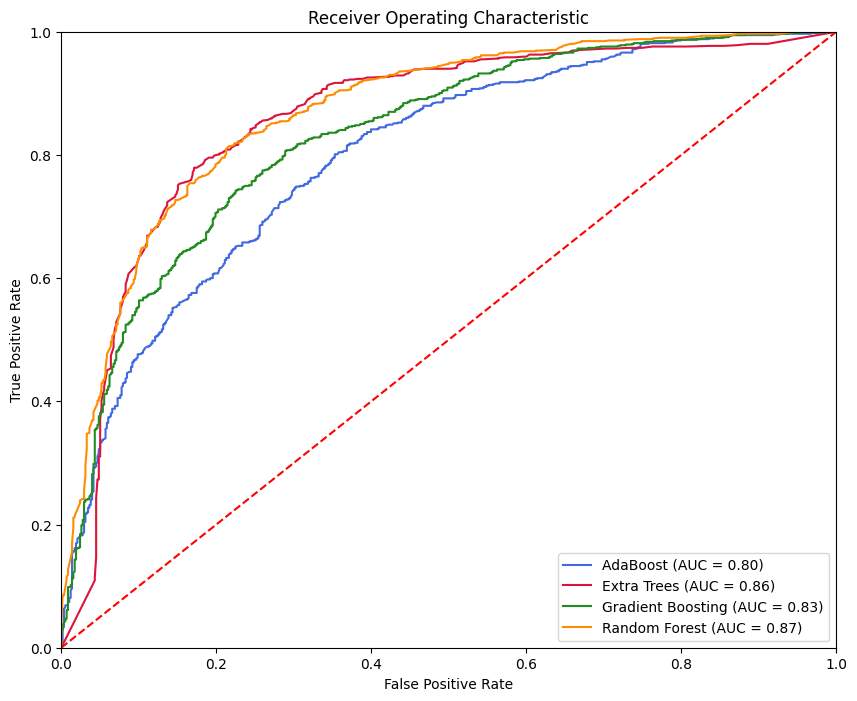

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np
roc_data = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics for training dataset
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)

    # Calculate metrics for testing dataset
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)

     # Compute ROC data
    y_proba_test = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba_test)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}


# Colors for the plot
colors = ['#4169e1', '#dc143c', '#228b22', '#ff8c00']

# Plot ROC Curves for all models
plt.figure(figsize=(10, 8))
for idx, (name, data) in enumerate(roc_data.items()):
    plt.plot(data['fpr'], data['tpr'], label=f'{name} (AUC = {data["auc"]:.2f})', color=colors[idx % len(colors)])

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'r--')

# Plot settings
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()